In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from matplotlib import pyplot as plt

In [34]:
import random
import numpy as np
import torch

In [64]:
import gymnasium as gym
from utils.replay_buffer import ReplayBuffer
from policies.dqn import DQN
from torch import nn

env = gym.make("CartPole-v1")

module = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(inplace=True),
    nn.Linear(128, 2)
)
policy = DQN(
    nn_module=module,
    state_dim=4,
    action_dim=2,
    lr=2e-3,
    eps=0.01,
    gamma=0.98,
)

results = []

In [65]:
buffer_size = 10000
minimal_size = 500
batch_size = 64

In [66]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [67]:
buffer = ReplayBuffer(capacity=buffer_size)

for epi in range(1000):
    observation, info = env.reset(seed=0)
    terminated = False
    truncated = False
    epi_len = 0
    total_return = 0

    while not terminated and not truncated:
        action = policy(observation)
        prev_obs = observation
        observation, reward, terminated, truncated, info = env.step(action)
        buffer.add(prev_obs, action, reward, observation, terminated, truncated)
        epi_len += 1
        total_return += reward

        if buffer.size() > minimal_size:
            sampled = buffer.sample(batch_size)
            policy.update(sampled)
    
    print("epi: {}; len: {}; return: {}".format(epi, epi_len, total_return))
    results.append((epi_len, total_return))
env.close()


epi: 0; len: 11; return: 11.0
epi: 1; len: 11; return: 11.0
epi: 2; len: 11; return: 11.0
epi: 3; len: 11; return: 11.0
epi: 4; len: 11; return: 11.0
epi: 5; len: 11; return: 11.0
epi: 6; len: 11; return: 11.0
epi: 7; len: 11; return: 11.0
epi: 8; len: 11; return: 11.0
epi: 9; len: 13; return: 13.0
epi: 10; len: 11; return: 11.0
epi: 11; len: 11; return: 11.0
epi: 12; len: 11; return: 11.0
epi: 13; len: 11; return: 11.0
epi: 14; len: 11; return: 11.0
epi: 15; len: 11; return: 11.0
epi: 16; len: 11; return: 11.0
epi: 17; len: 11; return: 11.0
epi: 18; len: 11; return: 11.0
epi: 19; len: 11; return: 11.0
epi: 20; len: 11; return: 11.0
epi: 21; len: 11; return: 11.0
epi: 22; len: 11; return: 11.0
epi: 23; len: 11; return: 11.0
epi: 24; len: 11; return: 11.0
epi: 25; len: 11; return: 11.0
epi: 26; len: 11; return: 11.0
epi: 27; len: 11; return: 11.0
epi: 28; len: 11; return: 11.0
epi: 29; len: 11; return: 11.0
epi: 30; len: 11; return: 11.0
epi: 31; len: 11; return: 11.0
epi: 32; len: 11; 

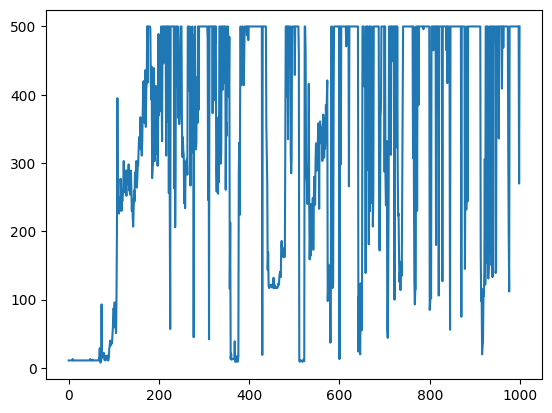

In [68]:
plt.plot([p[0] for p in results])

In [28]:
len(results)

500